<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/Browniano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def browniano(T=1, L=500):
    dt = T/L
    W = np.zeros(L+1)
    for i in range(L):
        xi = np.random.normal(0,1)
        W[i+1] = W[i] + np.sqrt(dt)*xi
    return W

In [3]:
trayectorias = 100

In [4]:
T = 1
L = 500
t = np.linspace(0, T, L+1)

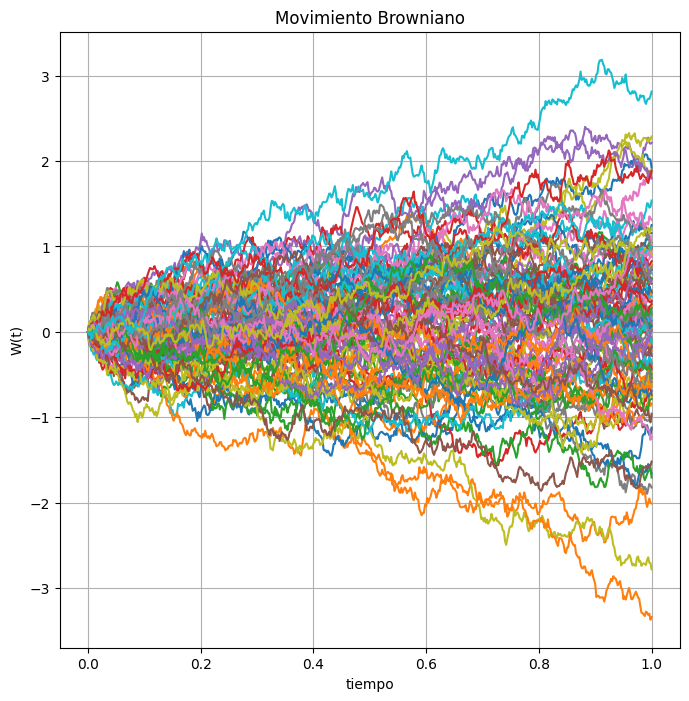

In [5]:
plt.figure(figsize=(8,8))
for _ in range(trayectorias):
    W = browniano(T, L)
    plt.plot(t, W)
plt.title("Movimiento Browniano")
plt.xlabel("tiempo")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Trayectoria browniana "gruesa"
def browniano(T=1.0, L=50):
    dt = T / L
    t = np.linspace(0, T, L+1)
    W = np.zeros(L+1)
    for i in range(L):
        xi = np.random.normal(0, 1)
        W[i+1] = W[i] + np.sqrt(dt) * xi
    return t, W

# 2) Refinamiento usando la fórmula de tu apunte
def refinar_trayectoria(t, W):
    n = len(W)             # n = L+1
    dt = t[1] - t[0]

    # nuevas listas: tendrán 2*n-1 puntos (se meten puntos medios)
    t_ref = np.zeros(2*n - 1)
    W_ref = np.zeros(2*n - 1)

    # copiamos los puntos originales en posiciones pares
    t_ref[::2] = t
    W_ref[::2] = W

    # rellenamos los puntos medios
    for i in range(n - 1):
        # tiempo medio
        t_ref[2*i + 1] = 0.5 * (t[i] + t[i+1])

        # ruido normal
        xi = np.random.normal(0, 1)

        # fórmula de refinamiento:
        # W_{i+1/2} = 1/2 (W_i + W_{i+1}) + 1/2 sqrt(dt) * xi
        W_ref[2*i + 1] = 0.5 * (W[i] + W[i+1]) + 0.5 * np.sqrt(dt) * xi

    return t_ref, W_ref

In [7]:
T = 1.0
L = 20

t, W = browniano(T, L)
t_ref, W_ref = refinar_trayectoria(t, W)

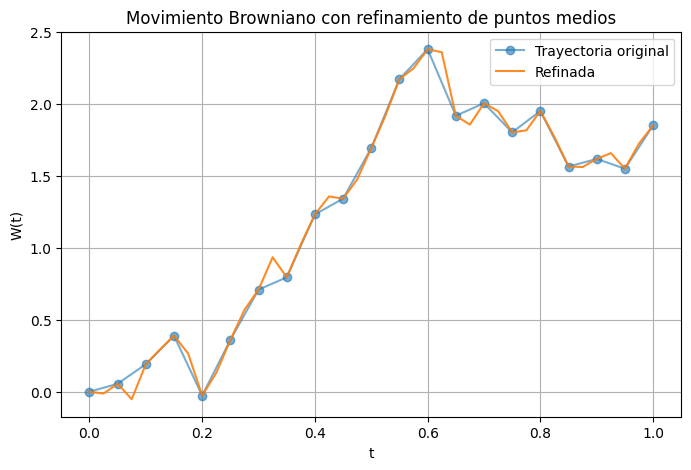

In [8]:
plt.figure(figsize=(8,5))
plt.plot(t, W, 'o-', label='Trayectoria original', alpha=0.6)
plt.plot(t_ref, W_ref, '-', label='Refinada', alpha=0.9)
plt.xlabel("t")
plt.ylabel("W(t)")
plt.title("Movimiento Browniano con refinamiento de puntos medios")
plt.grid(True)
plt.legend()
plt.show()